In [32]:
import sys
import os

# 获取当前 notebook 所在的目录
current_dir = os.getcwd()

# 获取项目根目录 (即当前目录的上一级)
project_root = os.path.abspath(os.path.join(current_dir, ".."))

# 将根目录加入到 Python 的搜索路径中
if project_root not in sys.path:
    sys.path.append(project_root)


import numpy as np
import matplotlib.pyplot as plt
from typing import Optional
from core.utils.common import error, info
from core.utils import radardsp as rdsp


from core.config import EL_CFAR_SKIP_BIN, NUMBER_RANGE_BINS_MIN
from core.config import NUMBER_DOPPLER_BINS_MIN
from core.config import NUMBER_AZIMUTH_BINS_MIN
from core.config import NUMBER_ELEVATION_BINS_MIN
from core.config import DOA_METHOD
from core.config import RDSP_METHOD

from core.config import RD_OS_CFAR_WS
from core.config import RD_OS_CFAR_GS
from core.config import RD_OS_CFAR_K
from core.config import RD_OS_CFAR_TOS

from core.config import AZ_OS_CFAR_WS
from core.config import AZ_OS_CFAR_GS
from core.config import AZ_OS_CFAR_TOS

# capon parameters
# from core.config import CAPON_METHOD
from core.config import AZ_BINS, EL_BINS, ANGLE_RES_EL, ANGLE_RES_AZ, AZ_RANGE, EL_RANGE,AZ_MESH, EL_MESH

from core.config import RA_OS_CFAR_WS
from core.config import RA_OS_CFAR_GS
from core.config import RA_OS_CFAR_K
from core.config import RA_OS_CFAR_TOS

from core.config import EL_OS_CFAR_WS
from core.config import EL_OS_CFAR_GS
from core.config import EL_OS_CFAR_TOS

# CFAR skip bin
from core.config import CFAR_SKIP_RANGE_BIN_NEAR, CFAR_SKIP_RANGE_BIN_FAR, CFAR_SKIP_AZIMUTH_BIN


import core.dsp as dsp


filepath = "../dataset/2_24_2021_aspen_run11/single_chip/adc_samples/data/frame_560.bin"
shape = (
                3, #num_tx
                4, #num_rx
                128, #num_chirps_per_frame
                128, #num_samples_per_chirp
                2 # I and Q signal measurements
            )
raw = np.fromfile(filepath, dtype=np.int16)
raw = np.reshape(raw, shape)


I = np.float16(raw[:, :, :, :, 0])
Q = np.float16(raw[:, :, :, :, 1])
raw = I + 1j * Q

In [33]:
coupling_num_tx=3
coupling_num_rx=4
waveform_num_adc_samples_per_chirp=128
coupling_data = np.array([-10558,-7146.95,4308.63,5150.11,68.9567,-1060.48,-354.233,96.6038,4.98345,-35.2318,-29.4129,-11.7758,-5.15801,-47.1053,35.0066,12.7284,-28.3658,8.63822,9.81632,-21.6387,1.4671,4.65447,-9.70529,0.435353,11.5253,-10.6196,0.737391,7.2031,-7.59364,-2.95372,5.81137,-2.02513,0.324868,0.876638,-0.339299,-1.65285,-0.713339,0.702061,2.61317,-2.27455,-4.59516,3.40333,5.8584,-4.05043,-2.2592,2.81089,1.36255,-0.44657,-2.55525,-3.90882,-0.068118,3.46481,2.50575,-0.608331,0.814347,-1.91542,-3.49019,4.85052,2.55489,-5.92381,1.10294,3.20974,-5.04459,0.741655,5.14235,-6.08022,-1.4708,7.14162,-1.17387,-2.34551,2.44323,-2.38759,-0.0325661,3.88568,-2.86046,-4.37058,1.51259,5.00106,0.836154,-4.51754,-1.37634,3.26645,3.1585,-4.40059,-5.89437,5.21711,5.13959,-4.96281,-1.21207,3.27939,-0.842913,2.43159,-0.38649,-6.30162,2.41268,1.2993,-2.64683,6.09567,3.02648,-7.88796,-3.86055,6.34123,1.88908,-7.73798,1.89931,10.366,-3.84956,-9.31355,1.34369,6.04407,2.72118,-2.43867,-1.17126,-1.24724,-2.63902,3.36011,1.66562,-5.55244,1.67358,6.67503,-3.29246,-4.39705,1.61906,-0.254214,-0.174395,4.82424,4.54496,-6.11466,14070,-20277.6,-4407.25,10462.2,-2237.12,1270.63,-447.91,-2062.23,662.834,-309.214,120.57,252.148,-37.0834,32.4086,-66.6633,31.5289,-20.4644,-94.8774,73.4813,14.5041,-34.5055,32.4051,-6.98617,-40.014,27.8466,15.8592,-25.8282,3.87074,10.1258,-22.9338,14.0787,18.4242,-16.7047,-0.845534,4.11221,-13.4576,9.38382,10.3209,-11.402,2.61023,5.77177,-13.9768,3.84057,12.2193,-11.7402,-2.43778,11.6239,-6.31308,-1.77099,6.31179,-4.49526,-0.185606,3.6268,-4.97822,1.33621,1.29093,-6.54234,4.54904,9.51849,-3.26467,-5.42785,-0.963846,-1.16508,1.83582,3.89545,-3.32524,-2.79542,7.18678,0.5686,-7.69517,2.05623,-0.28344,-1.89955,7.7392,-0.747353,-6.97299,2.29247,3.1473,-2.48401,0.217079,1.49636,-5.59055,1.08104,7.33886,-3.1146,-2.94283,6.59468,-2.11987,-7.98146,3.95687,0.363645,-3.91429,9.12967,1.50339,-10.9324,4.61486,7.36058,-7.05495,-1.90811,3.95712,-2.47312,-4.05284,2.78,4.56417,1.13384,-1.40319,-5.62855,-1.07282,5.89974,3.05743,-3.3541,-2.95011,3.57901,-0.406149,-3.89862,-0.118643,0.351624,5.50084,4.41245,-8.86908,-7.29087,6.28618,7.56815,-1.02774,-4.9431,-1.73312,2.01503,2.70688,2705.97,21925.8,-3835.05,-8539.07,208.33,-3213.35,1938.67,626.277,95.727,807.592,-245.156,64.3363,-63.0889,-4.85104,-12.0569,-97.1997,110.02,23.4327,-39.5582,70.7195,-20.8031,-39.326,33.8404,17.8452,-30.1962,9.37016,11.4872,-23.6185,16.3412,19.105,-21.4759,5.09134,8.90063,-12.4939,3.67568,12.1618,-8.87572,0.890027,9.99689,-12.0146,-4.80309,14.2017,-3.11728,-1.72865,1.77118,-8.47422,6.93543,13.2308,-12.6668,-9.40512,12.9469,-0.0223098,-6.29873,10.47,-7.71774,-9.8994,15.5814,-2.39141,-8.24513,15.1646,-4.863,-16.8977,13.3057,11.0016,-12.5975,-2.74096,2.97414,-1.91367,6.05962,2.82069,-10.2121,0.804932,11.5792,-6.66215,-7.15058,7.60536,-1.9428,-0.550057,6.34906,-6.7605,-3.1699,7.77128,-1.97003,-3.09968,5.45351,-0.28458,-6.10032,2.1008,1.6936,-3.02126,4.50458,4.47809,-8.38282,-7.164,8.5888,8.76869,-2.98814,-8.21821,-0.345234,6.77649,-3.52868,-5.49581,6.7172,3.7555,-8.7669,-0.715664,7.47499,-1.49682,-0.496251,3.24915,-4.2224,-5.51848,4.49997,5.12886,-2.59601,-1.29522,0.107251,-1.70876,0.756956,1.96185,0.988068,-0.0411336,-2.35485,-2.62305,-0.85327,2.70401,2.3718,0.444549,13986.8,32974.8,-11088.4,-15735.5,2296.81,-3412.09,2773.25,1376.64,-223.329,1095.96,-316.994,18.3444,-72.3101,-21.7122,10.7436,-103.488,117.882,49.3123,-57.1191,85.1035,-19.7146,-56.2296,40.6203,31.2213,-35.7315,13.3702,7.46508,-29.1043,23.5015,31.3209,-31.4775,-2.30009,12.0736,-8.3278,6.77337,11.8867,-16.6636,2.28817,11.9857,-18.2785,0.227813,27.5559,-11.4906,-16.2099,9.73057,4.26964,1.06752,5.71562,-10.5773,-4.8391,10.8632,-1.12834,-4.49658,5.26611,-5.08087,-1.89912,8.79633,-5.33804,-6.30355,15.8985,0.121647,-15.5677,5.06478,6.97047,-9.09666,0.793081,10.6611,-3.1353,-5.20749,1.38209,-4.88998,3.24723,8.1967,-6.03169,-4.96533,9.37075,1.09219,-8.86152,0.636613,0.911655,1.6792,6.72392,-6.77768,-3.46542,6.53138,-4.97394,-4.70411,10.1304,6.98767,-8.34761,-3.94925,4.38711,-4.72417,-0.743205,5.52181,-3.49962,-1.52902,2.13456,0.58792,5.44543,1.55947,-8.79363,-4.02583,8.14742,1.7875,-6.40694,1.41233,0.621486,-0.931254,5.74857,-2.95668,-3.95042,3.42512,-2.03313,0.660737,4.30598,-2.65093,-1.53001,4.65013,-2.0852,-7.00885,2.42864,4.03885,-1.07943,-1.67297,-0.59016,3.01874,2.01927,-13793.5,2278.51,6605.74,-2287.22,900.447,580.317,-480.746,819.742,-328.63,-2.54311,-61.2448,-81.0864,-2.84627,-66.8415,48.2669,11.792,-35.1598,41.5561,-18.6963,-36.393,18.4224,3.36221,-18.41,4.41449,3.95453,-14.2328,6.46958,10.3902,-9.02545,-2.28455,-1.00608,-5.94529,5.7975,3.7147,-8.60812,1.93527,4.9153,-8.53571,1.52054,8.70745,-6.61282,-5.45877,6.27356,0.524397,-3.97527,0.364627,-1.4773,-1.45473,5.26157,-0.278517,-4.25434,4.44928,-2.30199,-6.44941,7.34822,0.675358,-4.32026,7.61531,-2.57989,-12.4518,5.66161,10.2269,-5.55258,-3.29677,3.10367,-0.521694,2.07624,-0.648572,-7.31168,-1.2112,3.86004,4.00608,2.98869,-3.89911,-5.83284,4.35262,5.03223,-7.51862,-2.63562,8.39192,0.683837,-3.11484,-2.00382,-4.86439,8.58537,8.7692,-11.6877,-8.28754,6.20132,4.71469,-2.6203,-2.71169,0.119712,2.278,4.41112,0.966466,-5.71175,-4.61128,4.22745,3.78401,1.28284,-0.160768,-6.94458,0.502813,3.95212,-4.99724,4.2309,6.89103,-7.62936,-4.21904,3.20737,-1.97889,1.92046,7.26638,-3.2938,-6.22137,2.72821,1.80478,-2.73436,-0.443881,2.8485,0.782824,-0.000390585,0.0266007,-3.83605,0.181544,2.76013,-3.61654,16690.8,-2893.82,-10080.4,4501.69,-745.687,-2627.35,1443.1,-889.507,405.292,415.474,-121.509,156.53,-32.2681,-22.5397,-18.4187,-39.8359,69.4801,-30.9902,11.0133,55.4519,-29.4033,-12.4996,25.7727,-6.80233,-2.32604,13.7787,-5.17299,-11.0649,12.1962,2.41694,-0.870969,7.97968,-7.25637,0.434331,13.2242,-6.71832,-10.0224,8.19013,3.28771,-6.23362,5.27933,4.19918,-3.5251,0.857968,-1.31853,-0.790482,7.27404,-1.3205,-12.5332,4.67022,13.5329,-9.31539,-3.18596,9.20631,-5.86513,0.984078,3.69486,-10.2768,4.18925,9.67033,-6.94079,-2.35462,6.1184,-2.87269,-3.49853,5.67443,-2.08989,-4.67288,6.90609,1.25777,-4.11202,0.73325,-0.407653,-2.37528,2.30266,6.65373,-3.7531,-6.28459,6.18623,2.32197,-5.06337,-0.269687,3.16261,-1.15804,-4.03751,-0.390878,5.08478,5.61786,-4.66878,-7.28017,4.71084,4.09755,-3.32864,2.16517,-0.560709,-6.12368,2.85592,4.33223,-0.328261,-1.96215,-1.20833,2.26715,-1.10929,-4.06813,1.08989,5.5269,1.92906,-3.29385,-2.50827,-0.669334,2.75315,1.86152,-3.18999,-2.41081,0.995421,4.92231,1.259,-4.69917,-2.46646,2.7223,1.85995,-3.61924,2.50766,3.99237,-5.65923,-3.70523,4.56064,3.83858,-19818.7,14290.6,8114.87,-11875.7,3667.53,2295.45,-776.796,2206.95,-899.973,134.315,-177.472,-232.235,-37.8368,-112.16,104.759,-31.1913,-25.6494,103.298,-72.3409,-35.4158,33.7412,-19.6544,-26.4737,27.565,-10.6761,-30.245,23.523,6.84723,-22.4692,16.0734,-0.807749,-21.2727,6.59083,4.61986,-12.8449,8.91439,3.48536,-18.083,5.15966,13.1927,-9.825,-1.2664,1.40991,-11.1978,7.0704,10.2231,-12.5616,1.77032,7.41399,-14.1678,-0.284866,11.5808,-5.32671,0.227957,2.10634,-8.23324,3.28483,6.73925,-8.57937,-7.09303,11.5302,3.15753,-8.32997,7.71762,-2.86684,-13.0475,8.92633,5.49899,-5.55954,4.87799,-0.813355,-8.31396,1.78173,5.32012,-0.365331,-1.28954,-2.60914,-3.63055,6.4891,4.70805,-7.68376,-2.00285,5.91796,0.391702,-2.22358,-0.188487,-5.02329,0.627409,7.57621,-4.21629,-4.53272,6.01386,2.88115,-4.373,-4.01822,3.25975,4.76012,-4.11465,-6.2748,2.92421,9.02231,-1.10193,-9.09802,2.36122,3.60785,-3.66945,1.95214,4.15471,-5.74578,-3.07182,8.05989,-4.09169,-3.93726,9.41896,-3.0678,-4.98437,5.22877,-3.3882,-5.12068,6.15493,5.13702,-1.21872,-2.77382,-3.06732,-2.17849,0.850006,1.98357,-0.0520865,20794.7,-36396.1,-3105.47,22444.9,-6593.89,675.722,-925.093,-3771.52,1239.84,-824.228,307.424,275.778,67.2985,88.6918,-114.276,107.952,-74.9755,-173.973,154.98,-7.40115,-57.1394,71.4506,-4.66229,-81.1107,51.0238,41.613,-47.5984,3.84796,22.9932,-49.4873,21.5267,38.0887,-30.7951,-2.69404,21.2523,-27.5413,4.11146,26.1072,-15.3266,-7.31113,13.0041,-11.926,4.59572,14.2858,-17.9557,-5.30452,19.726,-9.77313,-4.90657,13.3788,-7.52549,-6.82164,10.1342,-1.87204,-1.77761,5.83658,-5.26861,-5.24267,9.89306,-4.10901,-8.96207,14.7044,0.136155,-14.9655,16.5927,3.45557,-22.5436,9.16397,15.5408,-15.0215,-5.08003,10.8118,-3.49958,-1.4501,4.41181,-4.85823,5.47424,2.83213,-10.2486,2.85813,4.68082,-6.23026,2.85502,6.02466,-6.78421,-3.90493,9.88877,-0.789902,-10.2208,7.15505,6.95786,-10.0044,-2.10752,5.73691,-0.22302,0.630069,-0.561405,-3.48469,0.992061,1.30354,-1.47249,4.40345,2.71575,-8.64083,1.30405,4.91292,-5.97684,1.27083,4.72353,-1.35058,1.5559,-1.71735,-6.60023,2.6738,6.57916,-0.952868,-3.76422,0.322651,1.47398,-2.31146,-0.963684,2.13368,3.24758,-1.05106,-5.72815,1.72204,6.18745,-2.59791,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])



In [ ]:
# polar: bool = False, show: bool = True, method: str = "Capon"
#     ) -> None:
"""
    Process the raw ADC samples and render the 2D Range-Azimuth map.
    following the pipeline:
        1. Calibrate the raw ADC samples
        2. Apply the Range FFT processing +  beamforming method
        3. Render the 2D Range-Azimuth map

    Arguments:
        method: Beamforming method to use. Default is Capon
"""

def calibrate() -> np.array:
    """Handle the calibration of raw ADC samples.

    Return:
        Calibrated data based on the radar sensor's type

    NOTE: Only the casacde chip radar sensor has the frequency and phase
    calibration
    """
    if raw is None:
        exit(1)
    adc_samples = raw

    # Remove DC bias
    # adc_samples -= np.mean(adc_samples)

    adc_samples_sc = raw
    dc3_sc = np.mean(adc_samples_sc, axis=3)
    adc_samples = adc_samples_sc - dc3_sc[:,:,:,np.newaxis]

    return adc_samples


def get_fft_size(ne: Optional[int], na: Optional[int],
             nc: Optional[int], ns: Optional[int]) -> tuple[int, int, int, int]:
        """Get optimal FFT size.

        Arguments:
            ne: Size of the elevation axis of the data cube
            na: Size of the azimuth axis of the data cube
            nc: Number of chirp loops
            ns: Number of samples per chirp

        Return:
            Tuple of the optimal size of each parameter provided in argument
            in the exact same order.
        """
        # Estimated size of the elevation and azimuth
        if ne is not None:
            ne = rdsp.fft_size(ne)
            ne = (
                ne if ne > NUMBER_ELEVATION_BINS_MIN else NUMBER_ELEVATION_BINS_MIN
            )

        if na is not None:
            na = rdsp.fft_size(na)
            na = na if na > NUMBER_AZIMUTH_BINS_MIN else NUMBER_AZIMUTH_BINS_MIN

        if nc is not None:
            # Size of doppler FFT
            nc = rdsp.fft_size(nc)
            nc = nc if nc > NUMBER_DOPPLER_BINS_MIN else NUMBER_DOPPLER_BINS_MIN
        if ns is not None:
            # Size of range FFT
            ns = rdsp.fft_size(ns)
            ns = ns if ns > NUMBER_RANGE_BINS_MIN else NUMBER_RANGE_BINS_MIN

        return ne, na, nc, ns




def pre_process(adc_samples: np.array, apply_padding: bool = True) -> tuple[np.array, np.array]:
        """Pre processing of ADC samples.

        The pre-processing step helps in reshaping the data so to match
        the antenna layout of the radar sensor. Some paddings are also
        added if required in order to have a minimum of pre-defined
        frequency bins during FFT processing.

        Since the number of antenna and device configuration can vary
        from one board or recording to another,
        it's good to define a minimum size for the doppler, azimuth, and
        elevation FFT processing (See `config.py` for the default values).

        This does not affect the resolution of the radar sensor but only
        the 3D rendeing.

        Argument:
            adc_samples: Calibrated ADC samples

        Return (tuple):
            virtual_array: 4D data cube ready for FFT processing
        """



        rxl = []
        txl = []
        with open("../dataset/calib/single_chip/antenna_cfg.txt", "r") as fh:
            for line in fh:
                if line.startswith("# "):
                    continue
                else:
                    chunks = line.strip().split(" ")
                    if chunks[0] == "rx":
                        rxl.append([int(x) for x in chunks[1:]])
                    elif chunks[0] == "tx":
                        txl.append([int(x) for x in chunks[1:]])
                    # else:
                    #     setattr(self, chunks[0].lower(), float(chunks[1]))
        calibration_antenna_rxl = np.array(rxl)
        calibration_antenna_txl = np.array(txl)


        virtual_array = rdsp.virtual_array(
            adc_samples,
            calibration_antenna_txl,
            calibration_antenna_rxl,
        )

        # va_nel: Number of elevations in the virtual array
        # va_naz: Number of azimuth in the virtual array
        # va_nc: Number of chirp per antenna in the virtual array
        # va_ns: Number of samples per chirp
        va_nel, va_naz, va_nc, va_ns = virtual_array.shape

        Ne, Na, Nc, Ns = get_fft_size(*virtual_array.shape)
        if apply_padding:
            virtual_array = np.pad(
                virtual_array,
                (
                    (0, Ne - va_nel), (0, Na - va_naz),
                    (0, Nc - va_nc), (0, Ns - va_ns)
                ),
                "constant",
                constant_values=((0, 0), (0, 0), (0, 0), (0, 0))
            )
        return virtual_array


def get_coupling_calibration() -> np.array:
    """Return the coupling calibration array to apply on the range fft."""
    return np.array(coupling_data).reshape(
        coupling_num_tx,
        coupling_num_rx,
        1,
        waveform_num_adc_samples_per_chirp,
    )


def generate_range_azimuth_heatmap() -> np.array:
    """Generate heatmap."""
    # info("Generating heatmap using Beamforming")
    # Calibrated raw data
    adc_samples = calibrate()

    ntx, nrx, nc, ns = adc_samples.shape
    """ 
    No windowing function applied to the raw data 
    May adjust in the future
    Need to know exactly the impact of the windowing function
    especially on the phase model        
    """
    # ntx: Number of TX antenna
    # nrx: Number of RX antenna
    # nc: Number of chirp per antenna in the virtual array
    # ns: Number of samples per chirp
    ntx, nrx, nc, ns = adc_samples.shape
    _, _, Nc, Ns = get_fft_size(None, None, nc, ns)

    # Range-FFT
    # Apply Blackman window to match show_pcl.ipynb
    rfft = np.fft.fft(adc_samples * np.blackman(ns).reshape(1, 1, 1, -1), Ns, -1)
    # rfft = np.fft.fft(adc_samples, Ns, -1)
    rfft -= get_coupling_calibration()

    '''NO clutter removal applied, since static objects are also considered'''

    # Adjust original signal to the virtual array
    _rfft = pre_process(rfft,False) # No padding applied, which affects the covariance matrix

    # extract raw azimuth signal matrix in first dimension
    # checked!
    global showwww
    showwww = _rfft

    _rfft = _rfft[0, :, :, :]

    # swith first and second dimension into (num_chirps_per_frame, num_rx_antennas, num_range_bins)
    _rfft = np.swapaxes(_rfft, 0, 1)

    BINS_PROCESSED = _rfft.shape[2]
    # Generate a steering vector for AOA estimation given the theta range
    # using OpenRadar DSP library
    num_vec, steering_vec = dsp.gen_steering_vec(AZ_RANGE, ANGLE_RES_AZ, 8)
    range_azimuth = np.zeros((AZ_BINS, BINS_PROCESSED))
    method = 'Capon'
    for i in range(BINS_PROCESSED):
        if method == 'Capon':
            range_azimuth[:,i], _ = dsp.aoa_capon(_rfft[:, :, i].T, steering_vec, magnitude=True)
        elif method == 'Bartlett':
            range_azimuth_multi = dsp.aoa_bartlett(steering_vec, _rfft[:, :, i], axis =1)
            range_azimuth[:,i] = np.abs(range_azimuth_multi.sum(0)).squeeze()

    return range_azimuth

In [35]:
def get_bins(ns: Optional[int], nc: Optional[int], na: Optional[int],
        ne: Optional[int]) ->tuple[np.array, np.array, np.array, np.array]:
    """Return the range, velocity, azimuth and elevation bins.

    Arguments:
        ne: Elevation FFT size
        na: Azimuth FFT size
        nc: Doppler FFT size
        ns: Range FFT size

    Return:
        range bins
        velocity bins
        azimuth bins
        elevation bins

    NOTE: The bins are returned in the order listed above
    """
    # Number of TX antenna
    ntx: int = 3 # self.calibration.num_tx_antennas

    # ADC sampling frequency
    fs: float = 10666000 # self.calibration.waveform.adc_sample_frequency

    # Frequency slope
    fslope: float = 1.00000000377e+14 # self.calibration.waveform.frequency_slope

    # Start frequency
    fstart: float = 76999999488.0 # self.calibration.waveform.start_frequency

    # Ramp end time
    te: float = 1.99999994948e-05 # self.calibration.waveform.ramp_end_time

    # Chirp time
    tc: float = 0.000110000000859 + te # self.calibration.waveform.idle_time + te

    rbins = np.array([])        # Range bins
    vbins = np.array([])        # Doppler bins
    abins = np.array([])        # Azimuth bins
    ebins = np.array([])        # Elevation bins

    if ns:
        rbins = rdsp.get_range_bins(ns, fs, fslope)

    # if nc:
    #     # Velocity bins
    #     vbins = rdsp.get_velocity_bins(ntx, nc, fstart, tc)

    # if na:
    #     # Azimuth bins
    #     ares = 2 * AZIMUTH_FOV / na
    #     # Estimate azimuth angles and flip the azimuth axis
    #     abins = -1 * np.arcsin(
    #         np.arange(-AZIMUTH_FOV, AZIMUTH_FOV, ares) / (
    #             2 * np.pi * calibration_d
    #         )
    #     )

    # if ne:
    #     # Elevation
    #     eres = 2 * self.ELEVATION_FOV / ne
    #     # Estimate elevation angles and flip the elevation axis
    #     ebins = -1 * np.arcsin(
    #         np.arange(-self.ELEVATION_FOV, self.ELEVATION_FOV, eres) / (
    #             2 * np.pi * self.calibration.d
    #         )
        # )
    # return rbins, vbins, abins, ebins
    return rbins, None, None, None

flip done


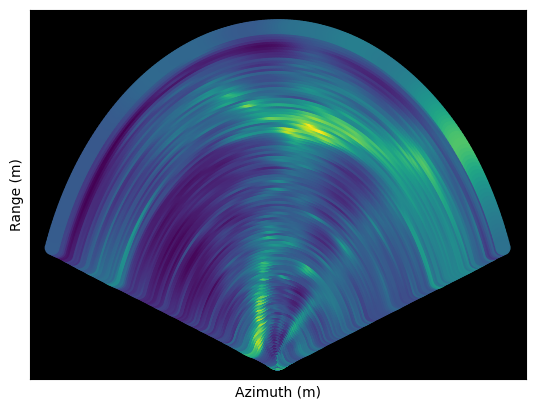

In [ ]:
if raw is None:
    info("No raw ADC samples available!")
    

        # info("Processing raw ADC samples...")
RAmap = generate_range_azimuth_heatmap()

RAmap_log = 20*np.log10(np.abs(RAmap))
# Apply double log to match show_pcl.ipynb brightness
RAmap = 20*np.log10(np.abs(RAmap_log))

Nr = RAmap.shape[1]




abins = np.linspace(-AZ_RANGE, AZ_RANGE, AZ_BINS)* (np.pi / 180)
rbins, _, _ , _ = get_bins(Nr, None, None, None)

polar=True
show=True
RAmap = np.transpose(RAmap, (1, 0))
if not polar:
    ''' Test for none polar plot'''
    az, rg = np.meshgrid(abins, rbins)
    _, ax = plt.subplots()
    RAmap = np.fliplr(RAmap)
    
    color = ax.pcolormesh(az, rg, RAmap, cmap="viridis")

    ax.set_xlabel("Azimuth (rad)")

    # labels
    ax.set_xlabel("Azimuth (rad)")
else:
    ''' Test for polar plot '''
    _r = np.kron(rbins, np.cos(abins))
    _az = np.kron(rbins, np.sin(abins))
    ax = plt.axes()

    RAmap = np.fliplr(RAmap)
    print("flip done")
    ax.scatter(
        _az,        # hmap[:, 0],
        _r ,        # hmap[:, 1],
        RAmap,       # hmap[:, 2],
        c=RAmap,     # hmap[:, 2],
    )

    ax.set_xlabel("Azimuth (m)")
    ax.set(facecolor="black")
ax.tick_params(axis='both', which='both', 
    bottom=False, top=False, left=False, right=False, 
    labelbottom=False, labeltop=False, labelleft=False, labelright=False)  

ax.set_ylabel("Range (m)")
if show:
    plt.show()